# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

from functions import chisq,ANOVA,catconsep,preprocessing,standardize,replacer,outliers

import pandas as pd

In [2]:
TR = pd.read_csv("C:/Users/admin/Downloads/training_set (3).csv")
TS = pd.read_csv("C:/Users/admin/Downloads/testing_set (2).csv")

# Preview

In [3]:
TR.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
TS.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


# Drop discrete\unnecessary columns from training DataSet

In [5]:
A=TR.drop(labels=["Loan_ID"],axis=1)

In [6]:
A.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
Tnew=TS.drop(labels=["Loan_ID"],axis=1)

In [8]:
Tnew.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


# Checking for Missing Data\Null Value

In [9]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
Tnew.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Missing Data Treatment

In [11]:
replacer(A)

In [12]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
replacer(Tnew)

In [14]:
Tnew.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Define X and Y

In [15]:
Y=A[["Loan_Status"]] #Assign Loan Status into Y

In [16]:
Y.head(3)

,Loan_Status
0,Y
1,N
2,Y


In [17]:
X=A.drop(labels=["Loan_Status"],axis=1) #drop Loan_status from A since we need to make prediction for this column only

In [18]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban


# Divide data in categotical and continous

In [19]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
        x = X[i].mode()[0]
        X[i] = X[i].fillna(x)
    else:
        con.append(i)
        x = X[i].mean()
        X[i] = X[i].fillna(x)

In [20]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [21]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Standardize

In [22]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xnew = pd.DataFrame(mm.fit_transform(X[con]),columns=con)

In [23]:
Xnew.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.070489,0.000000,0.198860,0.74359,1.0
1,0.065004,0.036192,0.172214,0.74359,1.0


In [24]:
Xnew.index=range(0,Xnew.shape[0])

In [25]:
Xnew.tail(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
604,0.146568,0.000000,0.704776,0.743590,1.0
605,0.027829,0.091199,0.198860,0.358974,1.0
606,0.040198,0.060000,0.237337,0.743590,1.0
607,0.047458,0.033864,0.214182,0.743590,1.0
608,0.038120,0.046800,0.143271,0.743590,1.0
609,0.034014,0.000000,0.089725,0.743590,1.0
610,0.048930,0.000000,0.044863,0.358974,1.0
611,0.097984,0.005760,0.353111,0.743590,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0
613,0.054830,0.000000,0.179450,0.743590,0.0


# Feature Selection

In [26]:
imp_cols=[]
pvals=[]

for i in Xnew.columns:
    if(Xnew[i].dtypes=="object"):
        pval=chisq(A,"Loan_Status",i)
        pvals.append(pval)
    else:
        pval=ANOVA(A,"Loan_Status",i)
        pvals.append(pval)

In [27]:
W=pd.DataFrame([Xnew.columns,pvals]).T
W.columns=["col","pval"]

In [28]:
W[W.pval<0.05]

,col,pval
4,Credit_History,0.0


In [29]:
W

,col,pval
0,ApplicantIncome,0.90252
1,CoapplicantIncome,0.14239
2,LoanAmount,0.36769
3,Loan_Amount_Term,0.60396
4,Credit_History,0.0


# Redefine X and Split

In [30]:
X=A[["Credit_History"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [31]:
#ytest

# Model1-Using Logistic Regression
Create Model

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)

In [33]:
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

In [34]:
pred_tr

array(['Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [35]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

0.81
0.82


In [36]:
#as we can see no overfitting in model so we will check using confusion matrix also.

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytrain,pred_tr))
print(confusion_matrix(ytest,pred_ts))

[[ 63  91]
 [  4 333]]
[[19 19]
 [ 3 82]]


In [38]:
pred_ts

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [39]:
model.predict_proba(xtest)

array([[0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.3155433 , 0.6844567 ],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.88772743, 0.11227257],
       [0.88772743, 0.11227257],
       [0.3155433 , 0.6844567 ],
       [0.3155433 , 0.6844567 ],
       [0.21301566, 0.78698434],
       [0.21301566, 0.78698434],
       [0.

In [40]:
ytrain.Loan_Status.value_counts()

Y    337
N    154
Name: Loan_Status, dtype: int64

In [41]:
#As we can see there is Imbalance in data so we will try with Random Forest Alogorithm

# Prepare Test Data for prediction

In [42]:
test=Tnew[["Credit_History"]]

In [43]:
test.head(3)

,Credit_History
0,1.0
1,1.0
2,1.0


In [44]:
pred_test=model.predict(test)

In [45]:
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [46]:
TS.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [47]:
B = TS[["Loan_ID"]]
B['Loan_Status']=pred_test

In [48]:
B.head(2)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y


In [49]:
B.to_csv("C:/Users/admin/Downloads/Loan Project/Logistic_Regression_Results.csv")

# Model 2- Using Random Forest Classifier
Create Model
Use same X and Y which we prepared earlier

In [50]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status"],axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
X1=X[con]
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

In [52]:
Xnew.shape

(614, 20)

# Split Data

In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=2)
model=rfc.fit(xtrain,ytrain)

pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc=accuracy_score(ytrain,pred_tr)
ts_acc=accuracy_score(ytest,pred_ts)

In [55]:
tr_acc

0.8065173116089613

In [56]:
ts_acc

0.8211382113821138

# Pruning

In [57]:
#max_depth,min_sample_leaf,min_samples_split

In [58]:
tr=[]
ts=[]
for i in range(2,80,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,max_depth=i)
    model=rfc.fit(xtrain,ytrain)

    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc=accuracy_score(ytrain,pred_tr)
    ts_acc=accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

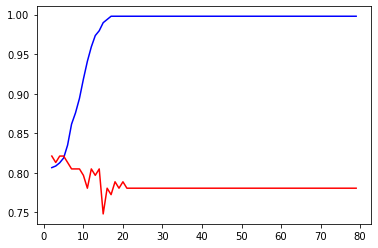

In [59]:
import matplotlib.pyplot as plt
plt.plot(range(2,80,1),tr,c="blue")
plt.plot(range(2,80,1),ts,c="red")

In [60]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

1.0
0.78


In [61]:
tr=[]
ts=[]
for i in range(2,80,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_leaf=i)
    model=rfc.fit(xtrain,ytrain)

    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc=accuracy_score(ytrain,pred_tr)
    ts_acc=accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

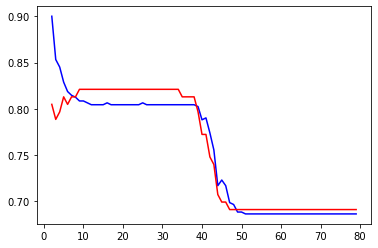

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(2,80,1),tr,c="blue")
plt.plot(range(2,80,1),ts,c="red")

In [63]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

0.69
0.69


In [64]:
tr=[]
ts=[]
for i in range(2,80,1):
    from sklearn.ensemble import RandomForestClassifier
    rfc=RandomForestClassifier(n_estimators=30,criterion="entropy",random_state=21,min_samples_split=i)
    model=rfc.fit(xtrain,ytrain)

    pred_tr=model.predict(xtrain)
    pred_ts=model.predict(xtest)

    from sklearn.metrics import accuracy_score
    tr_acc=accuracy_score(ytrain,pred_tr)
    ts_acc=accuracy_score(ytest,pred_ts)
    tr.append(tr_acc)
    ts.append(ts_acc)

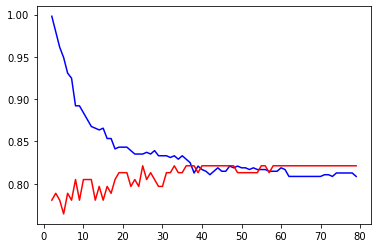

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(2,80,1),tr,c="blue")
plt.plot(range(2,80,1),ts,c="red")

In [66]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(ytrain,pred_tr),2))
print(round(accuracy_score(ytest,pred_ts),2))

0.81
0.82


# Prepare Test Data for Prediction

In [67]:
Tnew.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [69]:
#Tnew.isna().sum()

In [70]:
cat1,con1=catconsep(Tnew)

In [71]:
cat1

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [72]:
con1

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [73]:
ss1=StandardScaler()
X1t=TS[con1]
X2t=pd.get_dummies(TS[cat1])
Xnewt=X1t.join(X2t)

In [74]:
Xnewt.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [75]:
Xnewt.isna().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [76]:
replacer(Xnewt)

In [77]:
Xnewt.isna().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [78]:
pred_test1=model.predict(Xnewt)

In [79]:
pred_test1

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [80]:
Bt = TS[["Loan_ID"]]
Bt['Loan_Status']=pred_test1

In [81]:
Bt.head(2)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y


In [82]:
Bt.to_csv("C:/Users/admin/Downloads/Loan Project/Random_Forest_Results.csv")

# Model 3- Create NN

In [83]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status"],axis=1)

In [84]:
#A.head()

In [85]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [86]:
Y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [87]:
cat,con= catconsep(X)

In [88]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [89]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [90]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
Y.Loan_Status= le.fit_transform(Y)

In [91]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
X1=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2= pd.get_dummies(X[cat])
Xnew= X1.join(X2)

In [92]:
Xnew.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072651,-0.554368,0.000000,0.279851,0.45164,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.000000,-0.038610,-0.219273,0.279851,0.45164,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.462412,0.252103,-0.314547,0.279851,0.45164,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1


In [93]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [95]:
xtrain.shape[1]

20

# Create an ANN with only 1 hidden layer(untuned)

In [96]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
nn= Sequential()
nn.add(Dense(128,input_dim=xtrain.shape[1]))
nn.add(Dense(20))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

In [97]:
nn.compile(loss="binary_crossentropy",metrics="accuracy")

In [98]:
model=nn.fit(xtrain,ytrain,validation_split=0.2,epochs=50)

Epoch 1/50
13/13 [==============================] - 2s 38ms/step - loss: 0.6127 - accuracy: 0.6837 - val_loss: 0.4985 - val_accuracy: 0.8182
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4938 - accuracy: 0.8036 - val_loss: 0.4817 - val_accuracy: 0.8182
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4813 - accuracy: 0.8010 - val_loss: 0.4921 - val_accuracy: 0.8182
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 0.4625 - accuracy: 0.8087 - val_loss: 0.4814 - val_accuracy: 0.8182
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4530 - accuracy: 0.8087 - val_loss: 0.4862 - val_accuracy: 0.8182
Epoch 6/50
13/13 [==============================] - 0s 10ms/step - loss: 0.4607 - accuracy: 0.8061 - val_loss: 0.5057 - val_accuracy: 0.8081
Epoch 7/50
13/13 [==============================] - 0s 8ms/step - loss: 0.4701 - accuracy: 0.8112 - val_loss: 0.5016 - val_accuracy: 0.8182
Epoch 8/50
13/13 [

# Define a function to get best value for tunable parameter

In [99]:
def model_builder(hp):
    nn = Sequential()
    nn.add(Dense(128,input_dim=xtrain.shape[1]))
    x = hp.Int("units",min_value=32,max_value=256,step=32)
    nn.add(Dense(units=x))
    y = hp.Choice("rate",values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    nn.add(Dropout(rate=y))
    nn.add(Dense(1,activation="sigmoid"))
    nn.compile(loss="binary_crossentropy",metrics="accuracy")
    return nn

In [ ]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_accuracy",
            max_epochs=10,
            directory="C:/Users/hp/Desktop/Python Classess/Deep Learning/Project_II_end_to_end/KT_NN5",
            project_name="Keras_TUNER")

In [101]:
pip install keras-tuner --upgrade


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
            objective="val_accuracy",
            max_epochs=10,
            directory="Desktop/KT_NN5",
            project_name="Keras_TUNER")

INFO:tensorflow:Reloading Oracle from existing project Desktop/KT_NN5\Keras_TUNER\oracle.json
INFO:tensorflow:Reloading Tuner from Desktop/KT_NN5\Keras_TUNER\tuner0.json


In [103]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss",patience=25)

In [104]:
tuner.search(xtrain,ytrain,epochs=500,validation_split=0.2,callbacks=[es])

INFO:tensorflow:Oracle triggered exit


In [105]:
tuner.get_best_hyperparameters()[0].get("units")

32

In [106]:
tuner.get_best_hyperparameters()[0].get("rate")

0.7

# Create a NN with new value of tuned parameter

In [108]:
nn = Sequential()
nn.add(Dense(128,input_dim=xtrain.shape[1]))
nn.add(Dense(224))
nn.add(Dropout(0.6))
nn.add(Dense(1,activation="sigmoid"))
nn.compile(loss="binary_crossentropy",metrics="accuracy",optimizer="adam")
nn.fit(xtrain,ytrain,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 0.5669 - accuracy: 0.7449 - val_loss: 0.4994 - val_accuracy: 0.8182
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4832 - accuracy: 0.7883 - val_loss: 0.5135 - val_accuracy: 0.7980
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4787 - accuracy: 0.8036 - val_loss: 0.5109 - val_accuracy: 0.8081
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4619 - accuracy: 0.8010 - val_loss: 0.5011 - val_accuracy: 0.8081
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4637 - accuracy: 0.8112 - val_loss: 0.5052 - val_accuracy: 0.7980
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.4557 - accuracy: 0.8036 - val_loss: 0.4967 - val_accuracy: 0.8081
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4616 - accuracy: 0.8087 - val_loss: 0.5104 - val_accuracy: 0.8081
Epoch 8/1

13/13 [==============================] - 0s 14ms/step - loss: 0.4599 - accuracy: 0.8061 - val_loss: 0.5234 - val_accuracy: 0.7879
Epoch 59/100
13/13 [==============================] - 0s 12ms/step - loss: 0.4548 - accuracy: 0.8010 - val_loss: 0.5129 - val_accuracy: 0.8081
Epoch 60/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4627 - accuracy: 0.8061 - val_loss: 0.5056 - val_accuracy: 0.8081
Epoch 61/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4476 - accuracy: 0.8061 - val_loss: 0.5016 - val_accuracy: 0.8081
Epoch 62/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4490 - accuracy: 0.8061 - val_loss: 0.5015 - val_accuracy: 0.8081
Epoch 63/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4442 - accuracy: 0.8087 - val_loss: 0.5078 - val_accuracy: 0.8081
Epoch 64/100
13/13 [==============================] - 0s 10ms/step - loss: 0.4557 - accuracy: 0.8163 - val_loss: 0.5090 - val_accuracy: 0.8081
Epoch 65/100
1

In [109]:
tr=model.history["accuracy"]

In [110]:
ts=model.history["val_accuracy"]

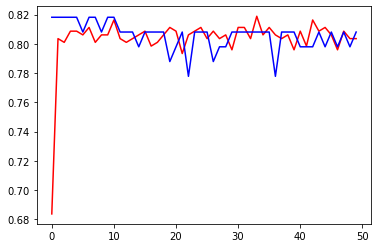

In [111]:
import matplotlib.pyplot as plt
plt.plot(tr, c= "red")
plt.plot(ts, c="blue")

In [112]:
pred=nn.predict(xtest)

4/4 [==============================] - 0s 4ms/step


In [113]:
Q=[]
for i in pred:
    if(i[0]<0.5):
        Q.append(0)
    else:
        Q.append(1)

In [115]:
#Q

In [116]:
pred1= le.inverse_transform(Q)
pred1

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [117]:
ytest1= le.inverse_transform(ytest)
ytest1

array(['N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [118]:
W=pd.DataFrame([ytest1,pred1]).T

In [119]:
W.columns=["Actual_Loan_Status","Predicted_Loan_Status"]

In [120]:
W.head(10)

,Actual_Loan_Status,Predicted_Loan_Status
0,N,N
1,Y,Y
2,Y,Y
3,Y,Y
4,N,N
5,Y,Y
6,N,Y
7,Y,Y
8,N,N
9,Y,N


In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest1,pred1)

0.7967479674796748

# Prepare Test Data for Prediction

In [122]:
Tnew.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [124]:
X1n=pd.DataFrame(ss.transform(Tnew[con]),columns=con)
X2n= pd.get_dummies(Tnew[cat])
Xnewn= X1n.join(X2n)

In [125]:
Xnewn.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [126]:
Xnewn.head(4)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.051517,-0.554368,-0.433638,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.381645,-0.041346,-0.243092,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,-0.066439,0.061259,0.733459,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502223,0.316402,-0.552730,0.279851,-0.047954,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [127]:
Xnewn.shape

(367, 20)

In [128]:
Xnew.shape

(614, 20)

In [129]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [130]:
pred_test3=nn.predict(Xnewn)

12/12 [==============================] - 0s 3ms/step


In [132]:
#pred_test3

In [133]:
Bn = TS[["Loan_ID"]]
Bn['Loan_Status']=pred_test3

In [134]:
Bn.head(3)

,Loan_ID,Loan_Status
0,LP001015,0.886357
1,LP001022,0.758571
2,LP001031,0.850836


In [135]:
Bn.to_csv("C:/Users/admin/Downloads/Loan Project/NN_Results.csv")

# Create Cluster

In [137]:
A=pd.read_csv("C:/Users/admin/Downloads/training_set (3).csv")

In [138]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [139]:
replacer(A)

In [140]:
cat =[]
con =[]

for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
        x = A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        con.append(i)
        x = A[i].mean()
        A[i]=A[i].fillna(x)

In [141]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


In [142]:
B = A.drop(labels=["Loan_ID"],axis=1)

In [143]:
# Columns which I chose for creating the Cluster- Applicant Income,Co-ApplicantIncome,Credit History,Property_Area,Loan_Amount

In [144]:
B = B[["ApplicantIncome","CoapplicantIncome","Credit_History","LoanAmount"]]

In [145]:
B.head(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount
0,5849.00000,0.0,1.0,146.412162
1,5405.54085,1508.0,1.0,128.000000
2,3000.00000,0.0,1.0,66.000000


In [146]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1=pd.DataFrame(ss.fit_transform(B),columns=["ApplicantIncome","CoapplicantIncome","Credit_History","LoanAmount"])

In [147]:
B.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount'], dtype='object')

# Create Clusters

In [148]:
k = range(1,15,1)
WCSS = []
for i in k:
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=i)
    model = km.fit(B)
    WCSS.append(model.inertia_)

Text(0.5, 1.0, 'Elbow curve')

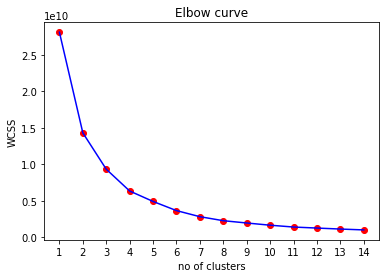

In [149]:
import matplotlib.pyplot as plt
plt.scatter(k,WCSS,c="red")
plt.plot(k,WCSS,c="blue")
plt.xticks(range(1,15,1))
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")

# No of Clusters =4

In [150]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(B)

In [151]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [152]:
B['Cluster_no']= model.labels_

In [153]:
B.head(2)

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Cluster_no
0,5849.00000,0.0,1.0,146.412162,0
1,5405.54085,1508.0,1.0,128.000000,0


In [154]:
B['Loan_ID']=A.Loan_ID

In [155]:
B.head(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Cluster_no,Loan_ID
0,5849.00000,0.0,1.0,146.412162,0,LP001002
1,5405.54085,1508.0,1.0,128.000000,0,LP001003
2,3000.00000,0.0,1.0,66.000000,0,LP001005


In [156]:
Bnew = B.sort_values(by="Cluster_no")

In [157]:
Bnew.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Cluster_no,Loan_ID
0,5849.0,0.0,1.0,146.412162,0,LP001002
401,2755.0,0.0,1.0,65.000000,0,LP002296
400,2889.0,0.0,0.0,45.000000,0,LP002288
399,1500.0,1800.0,0.0,103.000000,0,LP002287
398,3902.0,1666.0,1.0,109.000000,0,LP002284


# Find Similar Loan_ID for a given input

In [158]:
w = input("Enter the loan_ID: ")
cluster_no_of_input_loan_ID=Bnew[Bnew.Loan_ID == w].Cluster_no.values[0]
similar_loan_ID_applicable_for_loan  = list(Bnew[(Bnew['Cluster_no'] == cluster_no_of_input_loan_ID) & (Bnew.Loan_ID != w)].Loan_ID.values)

Enter the loan_ID: LP001002


In [159]:
similar_loan_ID_applicable_for_loan

['LP002296',
 'LP002288',
 'LP002287',
 'LP002284',
 'LP002281',
 'LP002277',
 'LP002272',
 'LP002266',
 'LP002265',
 'LP002263',
 'LP002250',
 'LP002244',
 'LP002243',
 'LP002239',
 'LP002237',
 'LP002236',
 'LP002234',
 'LP002181',
 'LP002187',
 'LP002188',
 'LP002190',
 'LP002197',
 'LP002205',
 'LP002300',
 'LP002209',
 'LP002223',
 'LP002224',
 'LP002225',
 'LP002226',
 'LP002229',
 'LP002231',
 'LP002211',
 'LP002180',
 'LP002301',
 'LP002308',
 'LP002434',
 'LP002429',
 'LP002424',
 'LP002418',
 'LP002409',
 'LP002408',
 'LP002407',
 'LP002401',
 'LP002398',
 'LP002390',
 'LP002387',
 'LP002379',
 'LP002370',
 'LP002369',
 'LP002368',
 'LP002367',
 'LP002366',
 'LP002314',
 'LP002318',
 'LP002319',
 'LP002328',
 'LP002332',
 'LP002335',
 'LP002305',
 'LP002337',
 'LP002345',
 'LP002347',
 'LP002348',
 'LP002357',
 'LP002361',
 'LP002362',
 'LP002341',
 'LP002178',
 'LP002175',
 'LP002170',
 'LP002036',
 'LP002035',
 'LP002031',
 'LP002024',
 'LP002008',
 'LP002006',
 'LP002004',

In [163]:
Cluster=Bnew[["Loan_ID","Cluster_no"]]

In [164]:
Cluster

,Loan_ID,Cluster_no
0,LP001002,0
401,LP002296,0
400,LP002288,0
399,LP002287,0
398,LP002284,0
...,...,...
372,LP002201,2
417,LP002342,3
581,LP002893,3
600,LP002949,3


In [165]:
Cluster.to_csv("C:/Users/admin/Downloads/Loan Project/Cluster_Results.csv")

# Regression Problem-3(a)

In [166]:
A=pd.read_csv("C:/Users/admin/Downloads/training_set (3).csv")
T=pd.read_csv("C:/Users/admin/Downloads/testing_set (2).csv")

In [167]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


In [168]:
A=A.drop(labels=["Loan_ID"],axis=1)

In [169]:
Tnew=T.drop(labels=["Loan_ID"],axis=1)

In [170]:
replacer(A)

In [171]:
replacer(Tnew)

In [172]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [173]:
Tnew.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Initial X and Y

In [174]:
Y=A[["LoanAmount"]]

In [175]:
X=A.drop(labels=["LoanAmount"],axis=1)

In [176]:
X.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,360.0,1.0,Urban,Y


In [177]:
cat,con=catconsep(X)

In [178]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [179]:
con

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

# Standardize the data

In [180]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [181]:
out=outliers(X1)

In [182]:
out

[9,
 14,
 68,
 94,
 126,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 313,
 333,
 402,
 409,
 417,
 443,
 495,
 497,
 546,
 575,
 581,
 585,
 600]

In [183]:
X = X.drop(index=out,axis=0)
Y = Y.drop(index=out,axis=0)

In [184]:
X.shape

(588, 11)

In [185]:
Y.shape

(588, 1)

In [186]:
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417.00000,4196.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333.00000,1516.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036.00000,2504.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006.00000,1526.0,360.0,1.0,Urban,Y
10,Male,Yes,2,Graduate,No,3200.00000,700.0,360.0,1.0,Urban,Y


In [187]:
X.index = range(0,588,1)

In [188]:
Y.index = range(0,588,1)

# EDA

In [190]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "LoanAmount ~ " + str(i)
    from statsmodels.stats.anova import anova_lm
    from statsmodels.formula.api import ols
    model = ols(rel,A).fit()
    W= anova_lm(model)
    round(W.iloc[0,4],4)
    print(rel,"--->  ",round(W.iloc[0,4],4))

LoanAmount ~ Gender --->   0.0074
LoanAmount ~ Married --->   0.0003
LoanAmount ~ Dependents --->   0.0001
LoanAmount ~ Education --->   0.0
LoanAmount ~ Self_Employed --->   0.0042
LoanAmount ~ Property_Area --->   0.5255
LoanAmount ~ Loan_Status --->   0.3677


In [191]:
#Removing those columns having higher pvalues>0.05
cat.remove("Property_Area")
cat.remove("Loan_Status")

In [192]:
cat

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

In [193]:
A.corr()["LoanAmount"].sort_values()

Credit_History      -0.007738
Loan_Amount_Term     0.038801
CoapplicantIncome    0.187884
ApplicantIncome      0.565552
LoanAmount           1.000000
Name: LoanAmount, dtype: float64

In [194]:
#Dropping the column based on correlation having less than
A= A.drop(labels=['Credit_History'],axis=1)

In [195]:
A.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,Urban,Y


# One Hot Coding of data

In [196]:
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [197]:
Y.head()

,LoanAmount
0,146.412162
1,128.000000
2,66.000000
3,120.000000
4,141.000000


# Split Data

In [198]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Backward Elimination OLS Model

In [200]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     46.88
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           4.76e-68
Time:                        19:45:38   Log-Likelihood:                -2549.1
No. Observations:                 470   AIC:                             5122.
Df Residuals:                     458   BIC:                             5172.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.739e+13   8.14e+14      0.058      0.954   -1.55e+15    1.65e+15
ApplicantIncome           52.4161      2.658     19.722      0.000      47.193      57.639
CoapplicantIncome         26.2039      2.651      9.883      0.000      20.993      31.414
Loan_Amount_Term           9.1249      2.540      3.593      0.000       4.134      14.115
Credit_History             0.1626      2.597      0.063      0.950      -4.942       5.267
Gender_Female          -4.149e+12   7.13e+13     -0.058      0.954   -1.44e+14    1.36e+14
Gender_Male            -4.149e+12   7.13e+13     -0.058      0.954   -1.44e+14    1.36e+14
Married_No             -9.319e+12    1.6e+14     -0.058      0.954   -3.24e+14    3.05e+14
Married_Yes            -9.319e+12    1.6e+14     -0.058      0.954   -3.24e+14    3.05e+14
Dependents_0            2.721e+11   4.67e+12      0.058      0.954   -8.91e+12    9.46e+12
Dependents_1            2.721e+11   4.67e+12      0.058      0.954   -8.91e+12    9.46e+12
Dependents_2            2.721e+11   4.67e+12      0.058      0.954   -8.91e+12    9.46e+12
Dependents_3+           2.721e+11   4.67e+12      0.058      0.954   -8.91e+12    9.46e+12
Education_Graduate     -1.644e+13   2.82e+14     -0.058      0.954   -5.71e+14    5.38e+14
Education_Not Graduate -1.644e+13   2.82e+14     -0.058      0.954   -5.71e+14    5.38e+14
Self_Employed_No       -1.776e+13   3.05e+14     -0.058      0.954   -6.17e+14    5.82e+14
Self_Employed_Yes      -1.776e+13   3.05e+14     -0.058      0.954   -6.17e+14    5.82e+14
==============================================================================
Omnibus:                       70.477   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.647
Skew:                           0.090   Prob(JB):                    1.83e-165
Kurtosis:                       9.221   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [201]:
round(model.rsquared_adj,5)

0.51833

In [202]:
model.pvalues.sort_values().index

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Dependents_3+', 'Dependents_1', 'Dependents_2',
       'Dependents_0', 'const', 'Self_Employed_Yes', 'Self_Employed_No',
       'Education_Not Graduate', 'Education_Graduate', 'Married_No',
       'Married_Yes', 'Gender_Female', 'Gender_Male'],
      dtype='object')

# Model 2

In [204]:
model.pvalues.sort_values().index[-1]

'Gender_Male'

In [205]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [206]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.48098

# Model 3

In [207]:
model.pvalues.sort_values().index[-1]

'Credit_History'

In [208]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [209]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.48209

# Model 4

In [210]:
model.pvalues.sort_values().index[-1]

'Gender_Female'

In [211]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [212]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.4827

# Model 5

In [213]:
model.pvalues.sort_values().index[-1]

'Dependents_2'

In [214]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [215]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.4827

# Model 6

In [216]:
model.pvalues.sort_values().index[-1]

'Dependents_0'

In [217]:
col_to_be_dropped= model.pvalues.sort_values().index[-1]

In [218]:
Xnew = Xnew.drop(labels=col_to_be_dropped,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain,has_constant="add")
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,5)

0.48379

# Check for Overfitting

In [219]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

In [220]:
tr_err

2807.4

In [221]:
ts_err

2556.34

# Regularize the Data
Create Tuning Grid and Lasso Model

In [222]:
tr=[]
ts=[]
w=[]
y=100
for i in range (0,2000,1):
    y=round(y+0.1,2)
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=y)
    model1 = rr.fit(xtrain,ytrain)
    tr_pred = model1.predict(xtrain) 
    ts_pred = model1.predict(xtest)
    tr_err1 = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err1 = round(mean_squared_error(ytest,ts_pred),2)
    w.append(y)
    tr.append(tr_err1)
    ts.append(ts_err1)


In [223]:
tr_err1

3269.93

In [224]:
ts_err1

3509.22

Text(0, 0.5, 'Loss')

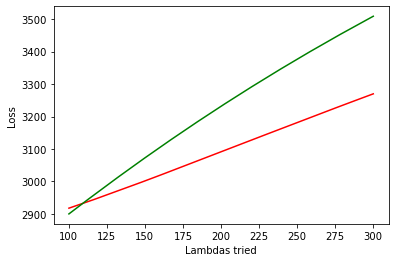

In [225]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")
plt.xlabel("Lambdas tried")
plt.ylabel("Loss")

# Using the best value of Alpha created Ridge Model

In [226]:
rr = Ridge(alpha=105.05)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
tr_err1 = round(mean_squared_error(ytrain,tr_pred),2)
ts_err1 = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err1,ts_err1)

2925.17 2917.32


# Create Tuning Grid and Lasso Model

In [227]:
tr=[]
ts=[]
w= []
y=0.05
for i in range (0,2000,1):
    y=round(y+0.1,2)
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=y)
    model1 = rr.fit(xtrain,ytrain)
    tr_pred = model1.predict(xtrain) 
    ts_pred = model1.predict(xtest)
    tr_err2 = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err2 = round(mean_squared_error(ytest,ts_pred),2)
    w.append(y)
    tr.append(tr_err2)
    ts.append(ts_err2) 

In [228]:
tr_err2

5532.87

In [229]:
ts_err2

6000.55

Text(0, 0.5, 'Loss')

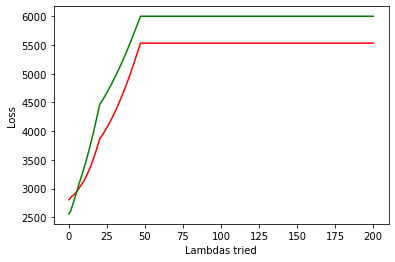

In [230]:
import matplotlib.pyplot as plt
plt.plot(w,tr,c="red")
plt.plot(w,ts,c="green")
plt.xlabel("Lambdas tried")
plt.ylabel("Loss")

# Using the best value of Alpha created Lasso Model

In [231]:
rr = Lasso(alpha=1.5)
model1 = rr.fit(xtrain,ytrain)
tr_pred = model1.predict(xtrain) 
ts_pred = model1.predict(xtest)
tr_err2 = round(mean_squared_error(ytrain,tr_pred),2)
ts_err2 = round(mean_squared_error(ytest,ts_pred),2)
print(tr_err1,ts_err1)

2925.17 2917.32


In [232]:
cols_to_keep = Xnew.columns

In [233]:
cols_to_keep

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Married_No', 'Married_Yes', 'Dependents_1', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes'],
      dtype='object')

In [234]:
Tnew.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [235]:
Xreg=Tnew.drop(labels=["LoanAmount"],axis=1)

In [236]:
catT,conT=catconsep(Xreg)

In [237]:
catT

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [238]:
conT

['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']

In [239]:
test1=Tnew[conT]

In [240]:
test1.head(4)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,5720,0,360.0,1.000000
1,3076,1500,360.0,1.000000
2,5000,1800,360.0,1.000000
3,2340,2546,360.0,0.825444


In [241]:
Xtest1=pd.DataFrame(ss.transform(test1),columns=test1.columns)

In [242]:
Xtest2=pd.get_dummies(Xreg[catT])

In [243]:
O = Xtest2.isna().sum()
O[O>0]

Series([], dtype: int64)

In [244]:
Xtest1.index

RangeIndex(start=0, stop=367, step=1)

In [245]:
Xtest_new=Xtest1.join(Xtest2)

In [246]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Married_No', 'Married_Yes', 'Dependents_1', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes'],
      dtype='object')

In [247]:
Xnew.shape

(588, 11)

In [248]:
Xtest_new.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

# Dropping those columns which are not present in Xnew and present in Xnew_test and giving error

In [250]:
Xfinal=Xtest_new.drop(labels=["Credit_History","Dependents_0","Dependents_1","Dependents_2","Dependents_3+","Property_Area_Rural","Property_Area_Semiurban","Property_Area_Urban"],axis=1)

In [251]:
Xfinal.head(2)

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.242954,-0.848285,0.231763,0,1,0,1,1,0,1,0
1,-0.534071,0.043810,0.231763,0,1,0,1,1,0,1,0


In [252]:
pred=model.predict(Xfinal)

In [253]:
#pred

In [254]:
R = TS[["Loan_ID"]]
R['Loan_Amount']=pred

In [255]:
R.head(3)

,Loan_ID,Loan_Amount
0,LP001015,144.960933
1,LP001022,131.316232
2,LP001031,156.084382


In [256]:
R.to_csv("C:/Users/admin/Downloads/Loan Project/Regression_Results.csv")